<h1>Notebook Data mining</h1>
<p>Réalisé par : Ayoub Laarouchi</p>
<p>Etude d'une dataset sur la crime au Los angeles de 2020 au 2024</p>

<h2>Imports</h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None

<h2>Data Understanding</h2>
<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
      <th>Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Division_Record_Number</td>
      <td>Official file number made up of a 2 digit year, area ID, and 5 digits</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Reported_Date</td>
      <td>MM/DD/YYYY</td>
      <td>Date & Time</td>
    </tr>
    <tr>
      <td>Occurred_Date</td>
      <td>MM/DD/YYYY</td>
      <td>Date & Time</td>
    </tr>
    <tr>
      <td>Occurred_Time</td>
      <td>In 24 hour military time.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Geographic_Area_ID</td>
      <td>The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Geographic_Area_Name</td>
      <td>The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Report_District_Number</td>
      <td>A four-digit code that represents a sub-area within a Geographic Area.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Part_Type</td>
      <td>Number</td>
      <td></td>
    </tr>
    <tr>
      <td>Crime_Code</td>
      <td>Indicates the crime committed. (Same as Crime Code 1)</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Crime_Code_Description</td>
      <td>Defines the Crime Code provided.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Modus_Operandi</td>
      <td>Modus Operandi: Activities associated with the suspect in commission of the crime.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Victim_Age</td>
      <td>Two character numeric</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Victim_Sex</td>
      <td>F - Female M - Male X - Unknown</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Victim_Descent</td>
      <td>Descent Code representing ethnicity</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Premise_Code</td>
      <td>The type of structure, vehicle, or location where the crime took place.</td>
      <td>Number</td>
    </tr>
    <tr>
      <td>Premise_Description</td>
      <td>Defines the Premise Code provided.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Weapon_Used_Code</td>
      <td>The type of weapon used in the crime.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Weapon_Description</td>
      <td>Defines the Weapon Used Code provided.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Case_Status</td>
      <td>Status of the case. (IC is the default)</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Status_Description</td>
      <td>Defines the Status Code provided.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Primary_Crime_Code</td>
      <td>Indicates the primary and most serious crime committed.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Secondary_Crime_Code_1</td>
      <td>May contain a code for an additional crime, less serious than Crime Code 1.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Secondary_Crime_Code_2</td>
      <td>May contain a code for an additional crime, less serious than Crime Code 1.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Secondary_Crime_Code_3</td>
      <td>May contain a code for an additional crime, less serious than Crime Code 1.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Location</td>
      <td>Street address of crime incident rounded to the nearest hundred block to maintain anonymity.</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Cross_Street</td>
      <td>Cross Street of rounded Address</td>
      <td>Plain Text</td>
    </tr>
    <tr>
      <td>Latitude</td>
      <td>Latitude</td>
      <td>Number</td>
    </tr>
    <tr>
      <td>Longitude</td>
      <td>Longitude</td>
      <td>Number</td>
    </tr>
  </tbody>
</table>


In [51]:
data  = pd.read_csv("data1.csv")
data.columns =  ['Division_Record_Number' , 'Reported_Date', 'Occurred_Date', 'Occurred_Time', 'Area_ID', 'Area_Name', 'Report_District',
              'Part_Type', 'Crime_Code', 'Crime_Desc', 'Modus_Operandi', 'Victim_Age', 'Victim_Sex',
              'Victim_Descent', 'Premise_Code', 'Premise_Desc', 'Weapon_Used_Code', 'Weapon_Desc',
              'Case_Status', 'Status_Desc', 'Primary_Crime_Code', 'Secondary_Crime_Code_1',
              'Secondary_Crime_Code_2', 'Secondary_Crime_Code_3', 'Location', 'Cross_Street', 'Latitude', 'Longitude']
data = data.set_index(["Division_Record_Number"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910707 entries, 190326475 to 240104953
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Reported_Date           910707 non-null  object 
 1   Occurred_Date           910707 non-null  object 
 2   Occurred_Time           910707 non-null  int64  
 3   Area_ID                 910707 non-null  int64  
 4   Area_Name               910707 non-null  object 
 5   Report_District         910707 non-null  int64  
 6   Part_Type               910707 non-null  int64  
 7   Crime_Code              910707 non-null  int64  
 8   Crime_Desc              910707 non-null  object 
 9   Modus_Operandi          783696 non-null  object 
 10  Victim_Age              910707 non-null  int64  
 11  Victim_Sex              789672 non-null  object 
 12  Victim_Descent          789663 non-null  object 
 13  Premise_Code            910697 non-null  float64
 14  Premise_Desc  

In [52]:
data.head(5)

,Reported_Date,Occurred_Date,Occurred_Time,Area_ID,Area_Name,Report_District,Part_Type,Crime_Code,Crime_Desc,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Desc,Weapon_Used_Code,Weapon_Desc,Case_Status,Status_Desc,Primary_Crime_Code,Secondary_Crime_Code_1,Secondary_Crime_Code_2,Secondary_Crime_Code_3,Location,Cross_Street,Latitude,Longitude
Division_Record_Number,,,,,,,,,,,,,,,,,,,,,,,,,,,
190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


<h2>Data pre-processing</h2>

[]

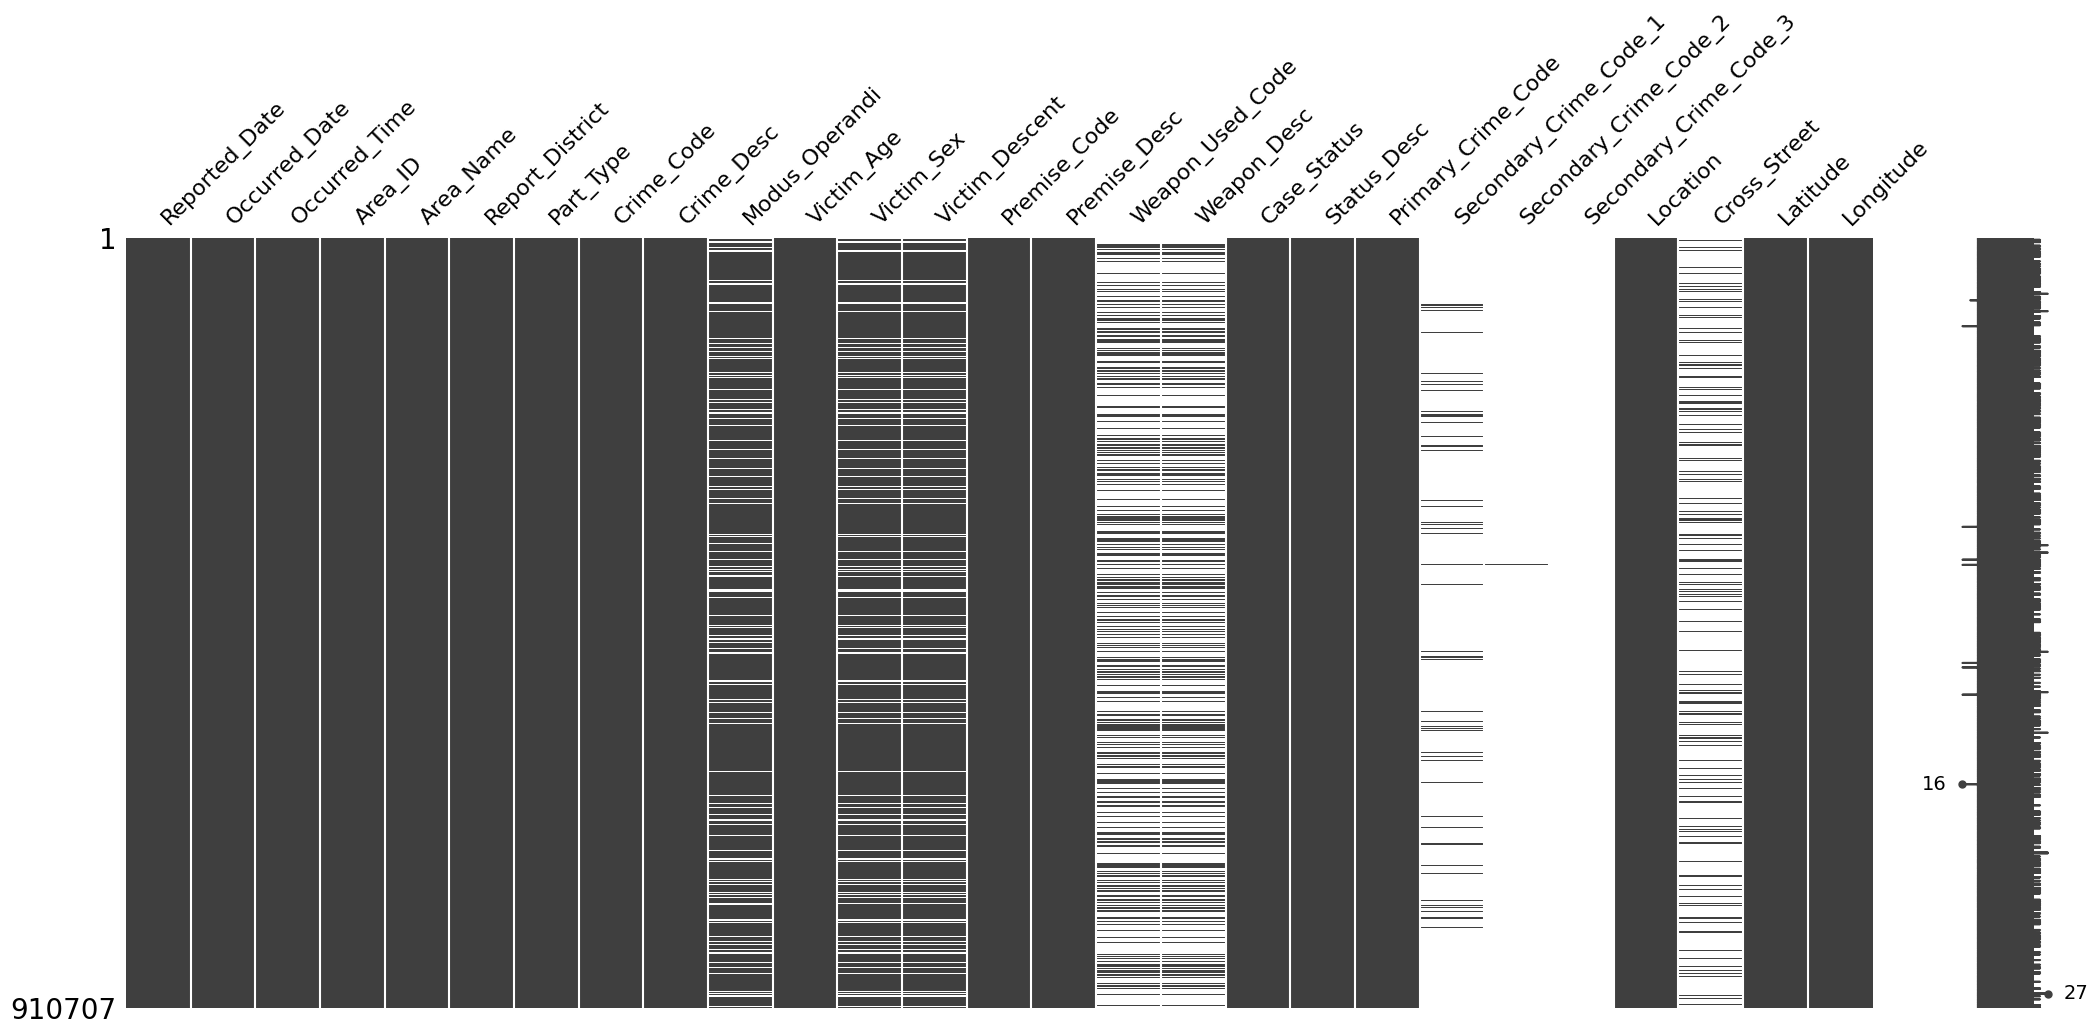

In [36]:
missingno.matrix(data)
plt.plot()

In [37]:
data.describe()

,Occurred_Time,Area_ID,Report_District,Part_Type,Crime_Code,Victim_Age,Premise_Code,Weapon_Used_Code,Primary_Crime_Code,Secondary_Crime_Code_1,Secondary_Crime_Code_2,Secondary_Crime_Code_3,Latitude,Longitude
count,910707.000000,910707.000000,910707.000000,910707.000000,910707.000000,910707.000000,910697.000000,315247.000000,910696.000000,66335.000000,2237.000000,64.00000,910707.000000,910707.000000
mean,1337.042061,10.698686,1116.307327,1.410830,500.809825,29.588992,306.502891,363.475262,500.552370,957.968222,983.913724,991.21875,33.989025,-118.059907
std,652.903148,6.102210,610.237433,0.491985,207.606033,21.851962,217.329569,123.700805,207.397779,110.627785,52.032905,27.06985,1.700407,5.894676
min,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,900.000000,5.000000,589.000000,1.000000,331.000000,0.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.00000,34.014500,-118.429600
50%,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058600,-118.321600
75%,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.163400,-118.273900
max,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


<h3>Area_ID & Area_Name</h3>
<p>Ces deux colonnes representent la même chose, on peut alors supprimer la colonne Area_ID.</p>

In [45]:
data[["Area_ID","Area_Name"]].drop_duplicates().sort_values(by=["Area_ID"])

,Area_ID,Area_Name
Division_Record_Number,,
200106753,1,Central
230204214,2,Rampart
200320258,3,Southwest
200412582,4,Hollenbeck
220508440,5,Harbor
220614831,6,Hollywood
190326475,7,Wilshire
230808643,8,West LA
200907217,9,Van Nuys


In [49]:
data = data.drop("Area_ID",axis=1)
print("Area_ID deleted successfully.")

Area_ID deleted successfully.


<h3>Crime_Code & Primary_Crime_Code</h3>

<p>C'est cité dans les données que Crime_Code et Primary_Crime_Code sont identiques, alors que si on verifie on trouve que ce n'est pas le cas.</p>

In [53]:
columns = [ "Crime_Code",  "Primary_Crime_Code" , "Secondary_Crime_Code_1" , "Secondary_Crime_Code_2" , "Secondary_Crime_Code_3" ]
unique_rows = data.drop_duplicates(columns)
unique_rows

,Reported_Date,Occurred_Date,Occurred_Time,Area_ID,Area_Name,Report_District,Part_Type,Crime_Code,Crime_Desc,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Desc,Weapon_Used_Code,Weapon_Desc,Case_Status,Status_Desc,Primary_Crime_Code,Secondary_Crime_Code_1,Secondary_Crime_Code_2,Secondary_Crime_Code_3,Location,Cross_Street,Latitude,Longitude
Division_Record_Number,,,,,,,,,,,,,,,,,,,,,,,,,,,
190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240905487,02/11/2024 12:00:00 AM,02/10/2024 12:00:00 AM,1720,9,Van Nuys,946,1,761,BRANDISH WEAPON,0370 1202 0334 1822,77,M,W,101.0,STREET,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,450.0,761.0,NaN,NaN,WOODMAN,N OXNARD ST,34.1794,-118.4312
240505143,01/30/2024 12:00:00 AM,01/30/2024 12:00:00 AM,1100,5,Harbor,505,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1803 1402 0344,0,X,X,213.0,WAREHOUSE,NaN,NaN,AA,Adult Arrest,341.0,668.0,998.0,NaN,900 FRANCISCO ST,NaN,33.8498,-118.2929
242104610,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,1730,21,Topanga,2156,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1402 0327 0444,47,M,X,404.0,DEPARTMENT STORE,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,343.0,624.0,998.0,NaN,6500 TOPANGA CANYON BL,NaN,34.1886,-118.6059


<p>On remarque qu'il y avait un mélange entre les valeurs lors de la saisie, on doit rectifier ça en les rendant en ordre.</p>

In [56]:
print("Nombre des valeurs égaux avec"+str(unique_rows.loc[unique_rows["Crime_Code"] == unique_rows["Primary_Crime_Code"]].shape[0]))
print("Number of equal values "+str(unique_rows.loc[unique_rows["Crime_Code"] == unique_rows["Secondary_Crime_Code_1"]].shape))
print("Number of equal values "+str(unique_rows.loc[unique_rows["Crime_Code"] == unique_rows["Secondary_Crime_Code_2"]].shape))
print("Number of equal values "+str(unique_rows.loc[unique_rows["Crime_Code"] == unique_rows["Secondary_Crime_Code_3"]].shape))


Nombre des valeurs egau1276
Number of equal values (243, 27)
Number of equal values (13, 27)
Number of equal values (0, 27)


In [57]:
ne_unique_rows = unique_rows.loc[unique_rows["Crm Cd"].ne(unique_rows["Crm Cd 1"])]
ne_unique_rows

KeyError: 'Crm Cd'

In [20]:
indexes = data.loc[data.apply(lambda x : x["Crm Cd"] == x["Crm Cd 2"], axis=1)].index

In [21]:
data.loc[indexes][columns].apply()

,Crm Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4
DR_NO,,,,,
221908151,821,812.0,821.0,NaN,NaN
221205458,820,812.0,820.0,NaN,NaN
221818077,820,812.0,820.0,NaN,NaN
241604069,820,812.0,820.0,NaN,NaN
221916942,820,812.0,820.0,NaN,NaN
...,...,...,...,...,...
241504283,623,437.0,623.0,NaN,NaN
240900593,812,760.0,812.0,998.0,NaN
240304521,761,626.0,761.0,NaN,NaN
